In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from datasets import load_dataset

def load_oasst1_data():
    ds = load_dataset("OpenAssistant/oasst1")
    return ds["train"].to_pandas()

def analyze_oasst1(data):
    df = pd.DataFrame(data)
    
    print(f"Total number of messages: {len(df)}")
    print(f"Number of unique message trees: {df['message_tree_id'].nunique()}")
    print(f"Number of unique users: {df['user_id'].nunique()}")
    
    # Role distribution
    role_counts = df['role'].value_counts()
    print("\nRole distribution:")
    print(role_counts)
    
    # Language distribution
    lang_counts = df['lang'].value_counts()
    print("\nTop 10 languages:")
    print(lang_counts.head(10))
    
    # Tree state distribution
    tree_state_counts = df['tree_state'].value_counts()
    print("\nTree state distribution:")
    print(tree_state_counts)
    
    # Review statistics
    print(f"\nAverage review count: {df['review_count'].mean():.2f}")
    print("\nReview result distribution:")
    print(df['review_result'].value_counts(normalize=True))
    
    # Synthetic message analysis
    synthetic_count = df['synthetic'].sum()
    print(f"\nSynthetic messages: {synthetic_count} ({synthetic_count/len(df)*100:.2f}%)")
    
    # Model name distribution
    model_counts = df['model_name'].value_counts()
    print("\nTop 5 model names:")
    print(model_counts.head())
    
    # Message length distribution
    df['message_length'] = df['text'].str.len()
    
    # Time analysis
    df['created_date'] = pd.to_datetime(df['created_date'])
    df['day'] = df['created_date'].dt.date
    messages_per_day = df.groupby('day').size()
    
    # Visualizations
    plt.figure(figsize=(15, 10))
    
    plt.subplot(231)
    role_counts.plot(kind='bar')
    plt.title('Role Distribution')
    plt.ylabel('Count')
    
    plt.subplot(232)
    lang_counts.head(10).plot(kind='bar')
    plt.title('Top 10 Languages')
    plt.ylabel('Count')
    
    plt.subplot(233)
    plt.hist(df['message_length'], bins=50)
    plt.title('Message Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    
    plt.subplot(234)
    tree_state_counts.plot(kind='bar')
    plt.title('Tree State Distribution')
    plt.ylabel('Count')
    
    plt.subplot(235)
    plt.plot(messages_per_day.index, messages_per_day.values)
    plt.title('Messages per Day')
    plt.xlabel('Date')
    plt.ylabel('Number of Messages')
    plt.xticks(rotation=45)
    
    plt.subplot(236)
    df['review_result'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Review Result Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Emoji analysis
    all_emojis = [emoji for emojis in df['emojis'].dropna() for emoji in emojis]
    emoji_counts = Counter(all_emojis)
    print("\nTop 10 most used emojis:")
    print(pd.DataFrame(emoji_counts.most_common(10), columns=['Emoji', 'Count']))
    
    # Label analysis
    all_labels = [label for labels in df['labels'].dropna() for label in labels]
    label_counts = Counter(all_labels)
    print("\nTop 10 most common labels:")
    print(pd.DataFrame(label_counts.most_common(10), columns=['Label', 'Count']))
    
    # Detoxify analysis
    if 'detoxify' in df.columns and df['detoxify'].dtype == 'object':
        detoxify_df = pd.DataFrame(df['detoxify'].dropna().tolist())
        print("\nAverage toxicity scores:")
        print(detoxify_df.mean())



In [5]:
data = load_oasst1_data()
data.head()

,message_id,parent_id,user_id,created_date,text,role,lang,review_count,review_result,deleted,rank,synthetic,model_name,detoxify,message_tree_id,tree_state,emojis,labels
0,6ab24d72-0181-4594-a9cd-deaf170242fb,None,c3fe8c76-fc30-4fa7-b7f8-c492f5967d18,2023-02-05T14:23:50.983374+00:00,Can you write a short introduction about the r...,prompter,en,3,True,False,NaN,False,None,"{'toxicity': 0.00044308538781479, 'severe_toxi...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,"{'name': ['+1', '_skip_reply', '_skip_ranking'...","{'name': ['spam', 'lang_mismatch', 'pii', 'not..."
1,c8e83833-ecbc-44fe-b6db-735228c25a1c,6ab24d72-0181-4594-a9cd-deaf170242fb,2c96e467-66f0-4be7-9693-bda51356a424,2023-02-06T13:50:44.657083+00:00,"""Monopsony"" refers to a market structure where...",assistant,en,3,True,False,0.0,False,None,"{'toxicity': 0.00026396565954200923, 'severe_t...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,"{'name': ['+1', '_skip_labeling'], 'count': [3...","{'name': ['spam', 'fails_task', 'lang_mismatch..."
2,6708c47f-05c9-4346-b3d2-40b2bd24fde4,c8e83833-ecbc-44fe-b6db-735228c25a1c,2c96e467-66f0-4be7-9693-bda51356a424,2023-02-06T18:48:49.391686+00:00,Now explain it to a dog,prompter,en,3,True,False,NaN,False,None,"{'toxicity': 0.03648477792739868, 'severe_toxi...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,None,"{'name': ['spam', 'lang_mismatch', 'pii', 'not..."
3,343ee2d4-87ae-41fd-a768-bdd65959dc4a,6ab24d72-0181-4594-a9cd-deaf170242fb,49ddcb0d-6588-43bd-858d-19c577f12e7b,2023-02-06T13:37:56.044680+00:00,Monopsony is a market structure in which there...,assistant,en,3,True,False,1.0,False,None,"{'toxicity': 0.0008866374846547842, 'severe_to...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,"{'name': ['+1', '_skip_reply', '_skip_labeling...","{'name': ['spam', 'fails_task', 'lang_mismatch..."
4,18145bf4-37fd-4ac0-80f5-6108b5f2b365,343ee2d4-87ae-41fd-a768-bdd65959dc4a,e10e99a0-38ac-4b07-bf5d-4427696e4e0d,2023-02-06T18:52:51.428543+00:00,How can one fight back when a monospony had be...,prompter,en,3,True,False,NaN,False,None,"{'toxicity': 0.0009362137061543763, 'severe_to...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,"{'name': ['+1'], 'count': [1]}","{'name': ['spam', 'lang_mismatch', 'pii', 'not..."


In [3]:
data.columns

Index(['message_id', 'parent_id', 'user_id', 'created_date', 'text', 'role',
       'lang', 'review_count', 'review_result', 'deleted', 'rank', 'synthetic',
       'model_name', 'detoxify', 'message_tree_id', 'tree_state', 'emojis',
       'labels'],
      dtype='object')

Total number of messages: 84437
Number of unique message trees: 9846
Number of unique users: 12917

Role distribution:
role
assistant    52912
prompter     31525
Name: count, dtype: int64

Top 10 languages:
lang
en       39283
es       22763
ru        7242
zh        3314
de        3050
fr        2474
th        1460
pt-BR     1165
ca        1158
uk-UA      587
Name: count, dtype: int64

Tree state distribution:
tree_state
ready_for_export    84437
Name: count, dtype: int64

Average review count: 3.03

Review result distribution:
review_result
True     0.985083
False    0.014917
Name: proportion, dtype: float64

Synthetic messages: 0 (0.00%)

Top 5 model names:
Series([], Name: count, dtype: int64)


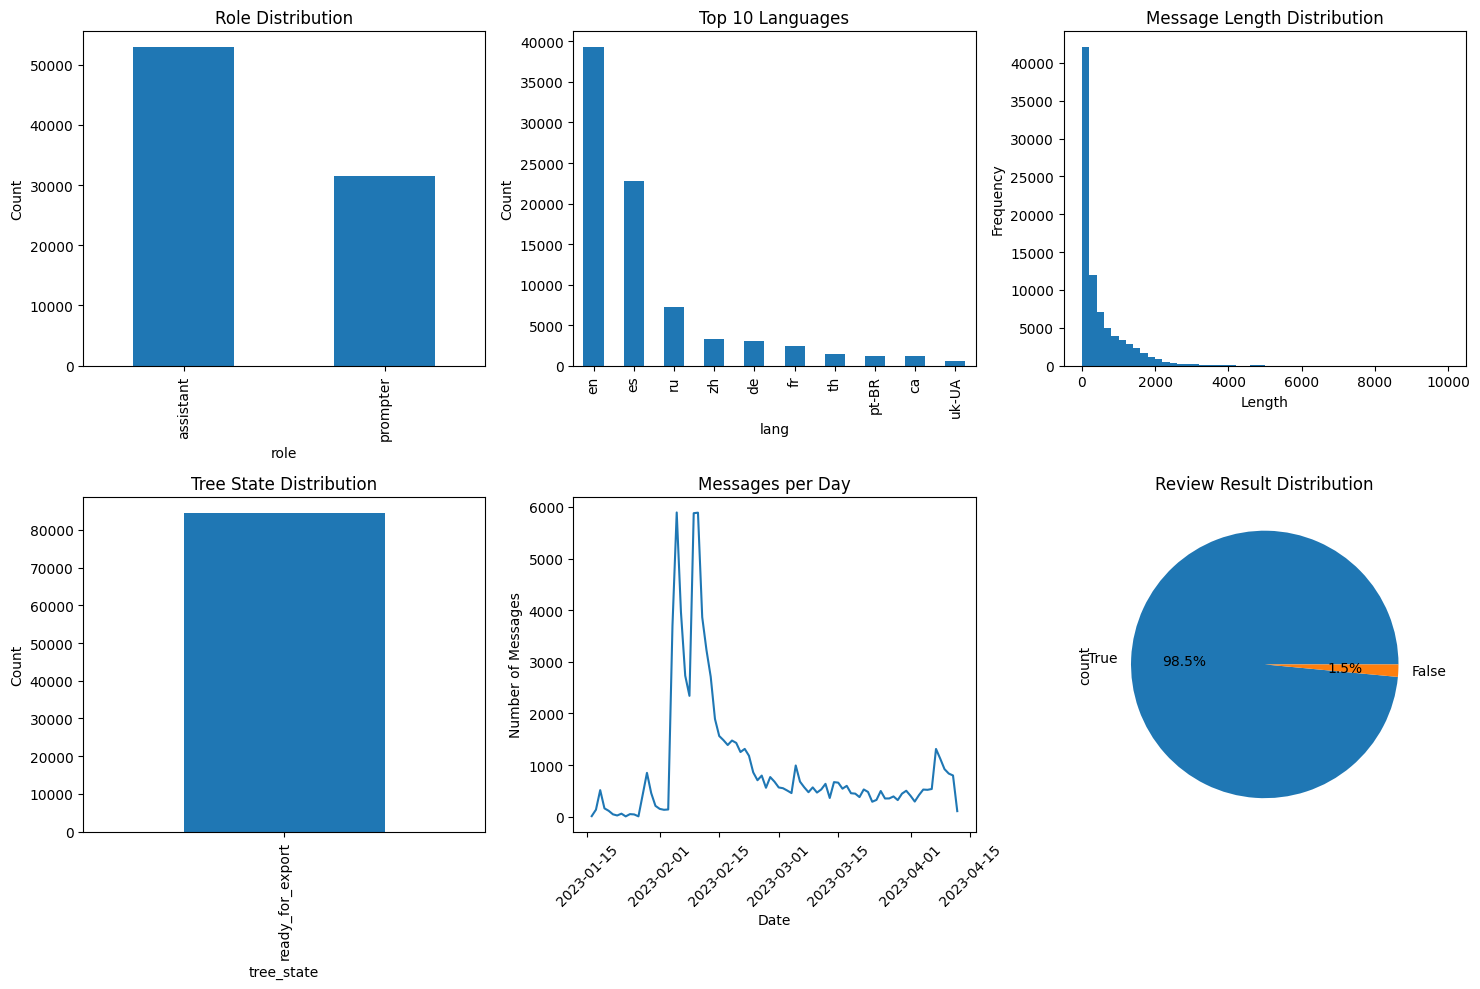


Top 10 most used emojis:
   Emoji  Count
0   name  71496
1  count  71496

Top 10 most common labels:
   Label  Count
0   name  84199
1  value  84199
2  count  84199

Average toxicity scores:
toxicity           0.010999
severe_toxicity    0.000715
obscene            0.006195
identity_attack    0.001251
insult             0.007572
threat             0.001143
sexual_explicit    0.002150
dtype: float64


In [6]:
analyze_oasst1(data)